In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

In [28]:
df = pd.read_excel("serie_temporal_municipios.xlsx",index_col=0, parse_dates=True)
df.head()

,AHUMADA,ALDAMA,ALLENDE,AQUILES SERDÁN,ASCENSIÓN,BACHÍNIVA,BALLEZA,BATOPILAS DE MANUEL GÓMEZ MORÍN,BOCOYNA,BUENAVENTURA,...,PRAXEDIS G. GUERRERO,RIVA PALACIO,ROSALES,SAN FRANCISCO DE BORJA,SAN FRANCISCO DE CONCHOS,SANTA ISABEL,SAUCILLO,TEMÓSACHIC,URIQUE,URUACHI
SEMANA_DIAG,,,,,,,,,,,,,,,,,,,,,
2025-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-01-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025-02-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


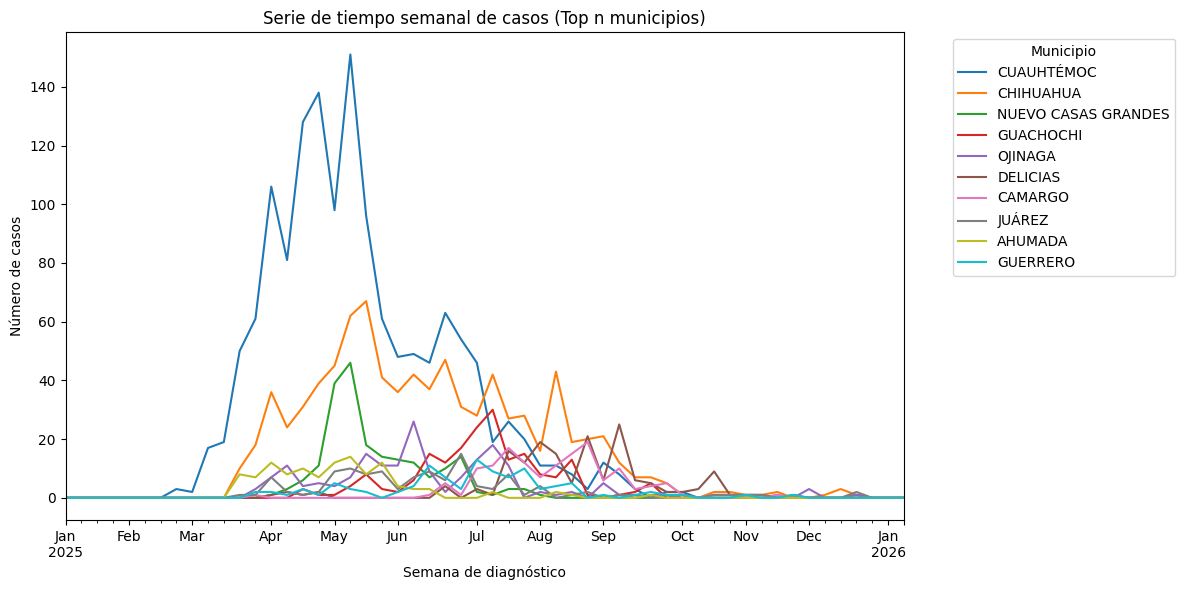

In [53]:
casos_mpio = df.sum(axis=0).sort_values(ascending=False)
df_top10 = df[top10_mpios].copy()
top10_mpios = casos_mpio.head(10).index

plt.figure(figsize=(12,6))
df_top10.plot(ax=plt.gca())   # cada municipio es una línea
plt.title("Serie de tiempo semanal de casos (Top n municipios)")
plt.xlabel("Semana de diagnóstico")
plt.ylabel("Número de casos")
plt.legend(title="Municipio", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


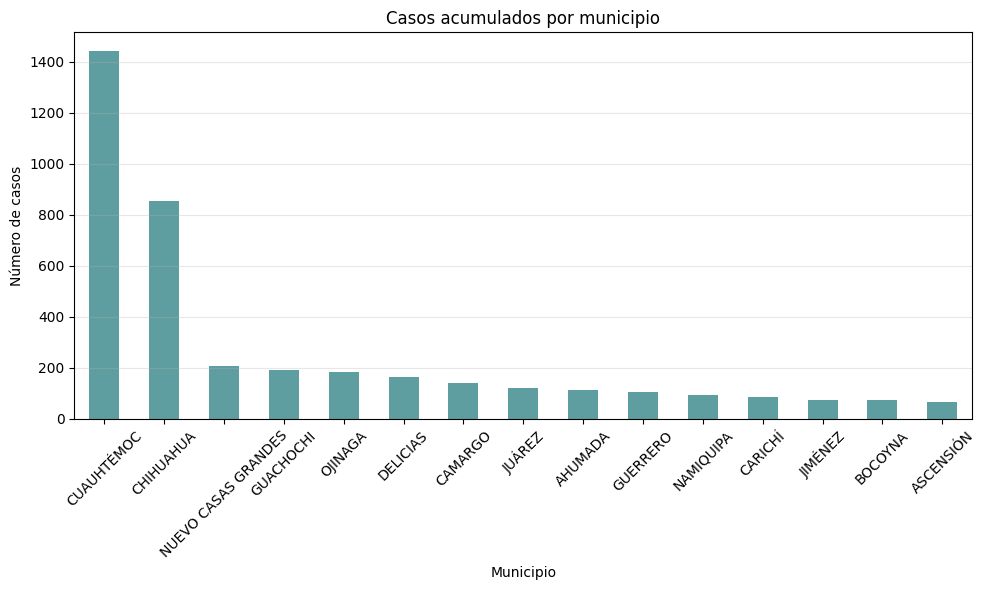

In [29]:
casos_municipio = df.sum(axis=0).sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
casos_municipio.plot(kind="bar",color='cadetblue')
plt.ylabel("Número de casos")
plt.xlabel("Municipio")
plt.title("Casos acumulados por municipio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y',alpha=0.3)
plt.show()

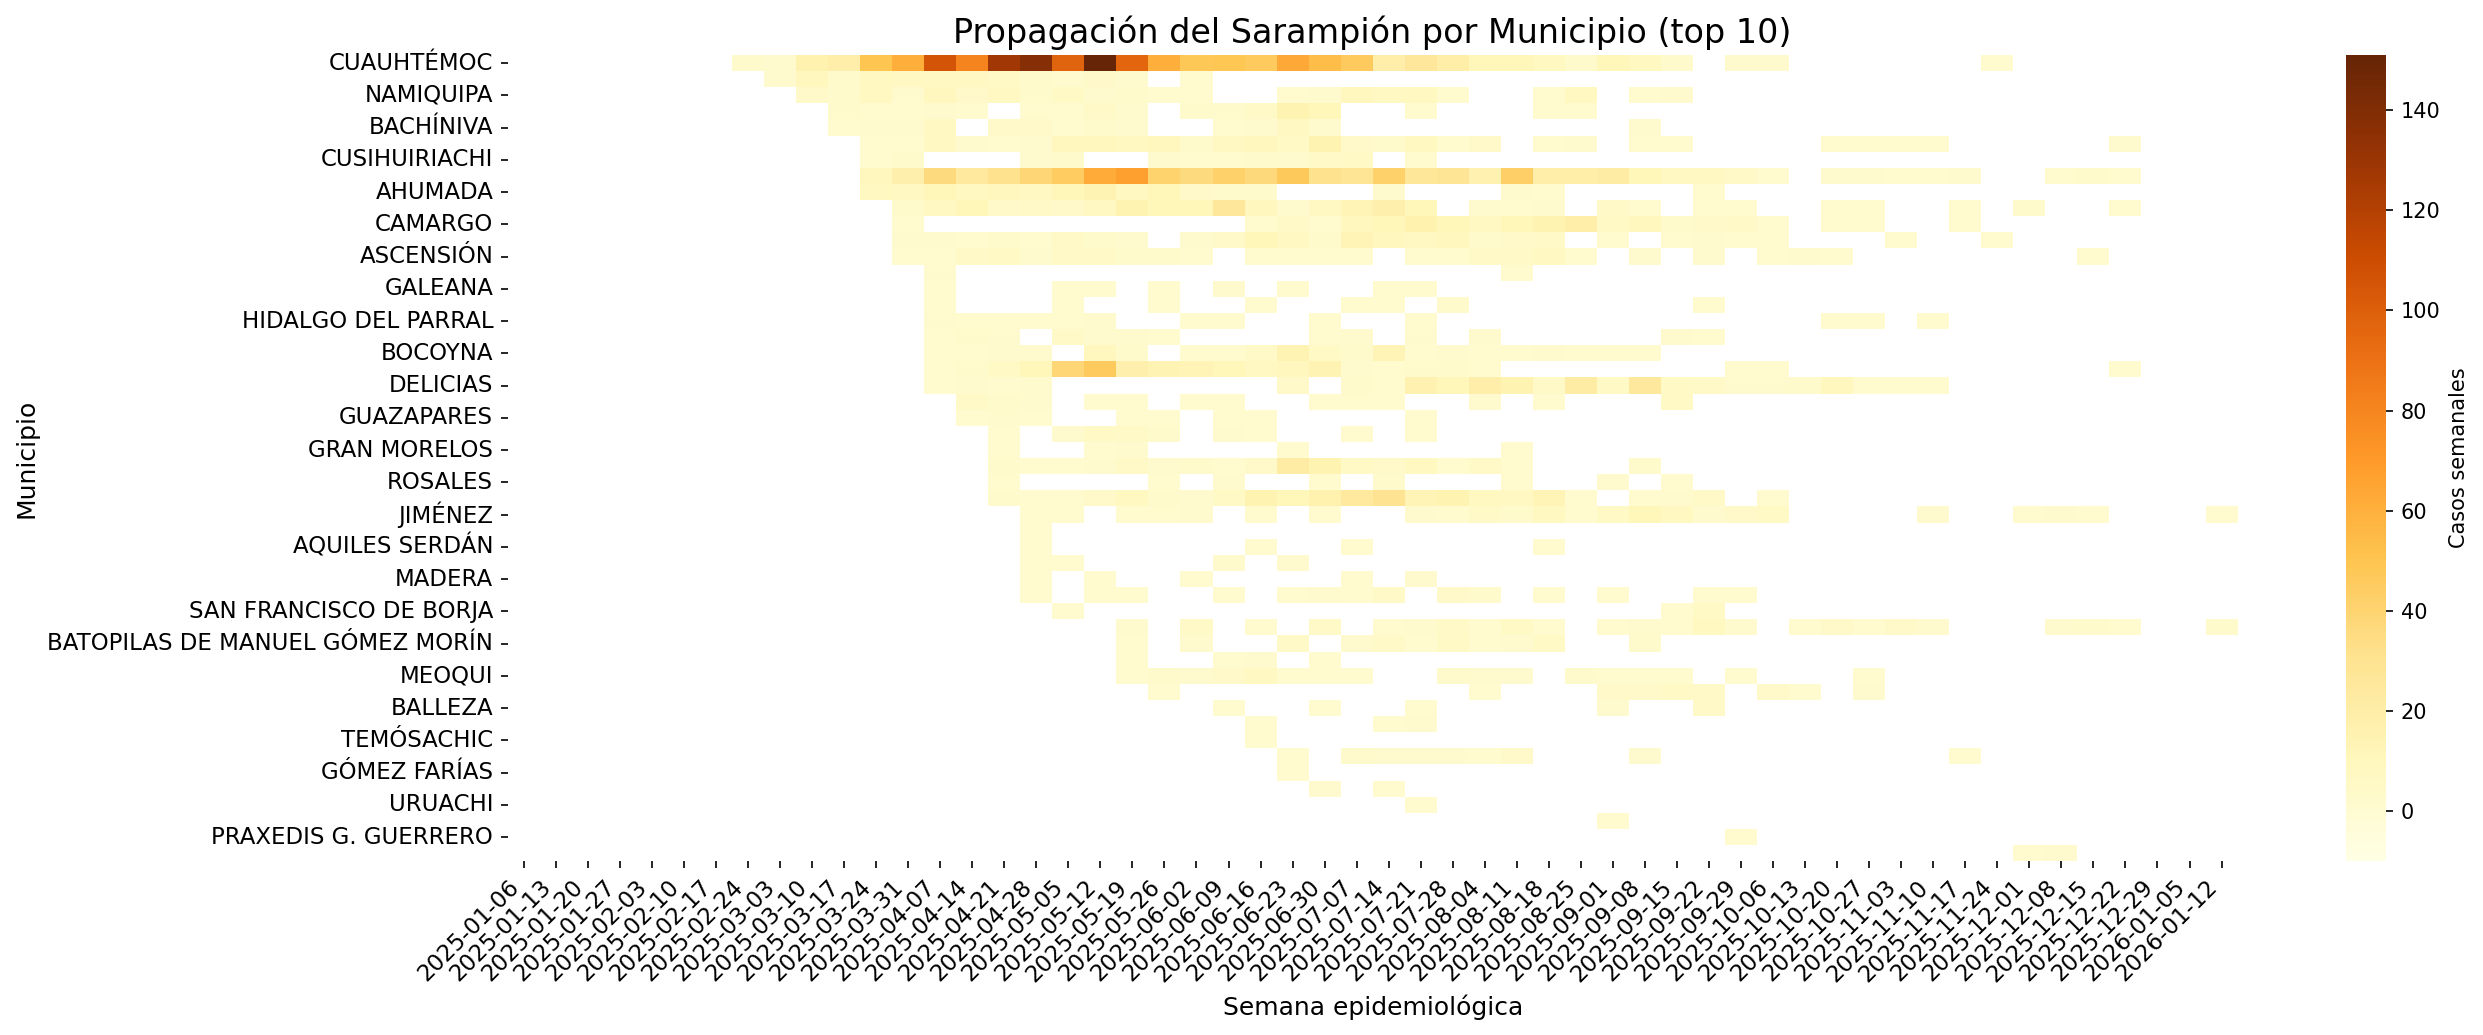

In [47]:
df.index.name = "SEMANA"   # Por claridad

df_heatmap = df.copy()

# Top municipios por casos totales
top_afectados = (
    df_heatmap.sum()
    .sort_values(ascending=False)
    .head(50)
    .index
)

df_filtered = df_heatmap[top_afectados].copy()

# ORDEN POR APARICIÓN DEL BROTE EN CADA MUNICIPIO
# semana del primer caso (primer índice donde la serie > 0)
primera_semana = (df_filtered > 0).apply(lambda col: col.idxmax() if (col > 0).any() else pd.NaT)

# Ordenamos por esa semana
orden_municipios = (
    primera_semana
    .sort_values()
    .index
)

df_ordered = df_filtered[orden_municipios]

plt.figure(figsize=(18, 7),dpi=150)

# ponemos los 0 en blanco
mask = df_ordered.T == 0

ax = sns.heatmap(
    df_ordered.T,
    cmap="YlOrBr",
    mask=mask,
    vmin=-10,
    cbar_kws={"label": "Casos semanales"},
)

ax.set_title(
    "Propagación del Sarampión por Municipio (top 10)",
    fontsize=16
)
ax.set_xlabel("Semana epidemiológica", fontsize=12)
ax.set_ylabel("Municipio", fontsize=12)

# Rotar etiquetas de semanas si están muy cargadas
ax.set_xticklabels(
    [x.strftime("%Y-%m-%d") for x in df_ordered.index],
    rotation=45,
    ha="right"
)
plt.tick_params(labelsize=11)
plt.tight_layout()
plt.show()

**Descripción.** El mapa de calor muestra la evolución semanal del brote de sarampión en los municipios más afectados del estado de Chihuahua. Cada fila corresponde a un municipio y cada columna a una semana epidemiológica, donde los tonos más intensos indican mayor número de casos. Se observa que el brote inicia con fuerza en **Cuauhtémoc**, que funge como epicentro, y posteriormente aparecen incrementos en municipios como **Chihuahua** y **Juárez**, mientras que otros presentan solo casos esporádicos. Esta visualización permite identificar claramente el patrón de propagación territorial y la dinámica temporal del brote.


In [25]:
resumen_mun = pd.DataFrame(index=df_ordered.columns)

# semana de primer caso
resumen_mun["primera_semana"] = (df_ordered > 0).apply(
    lambda col: col.idxmax() if (col > 0).any() else pd.NaT
)

# semanas con al menos 1 caso
resumen_mun["semanas_con_casos"] = (df_ordered > 0).sum()

# casos totales
resumen_mun["casos_totales"] = df_ordered.sum()

# semana del pico
resumen_mun["semana_pico"] = df_ordered.apply(
    lambda col: col.idxmax() if col.max() > 0 else pd.NaT
)

# valor del pico
resumen_mun["pico_casos"] = df_ordered.max()

resumen_mun


,primera_semana,semanas_con_casos,casos_totales,semana_pico,pico_casos
CUAUHTÉMOC,2025-02-24,33,1443,2025-05-12,151
CHIHUAHUA,2025-03-24,37,855,2025-05-19,67
JUÁREZ,2025-03-24,29,121,2025-06-30,15
AHUMADA,2025-03-24,17,114,2025-05-12,14
OJINAGA,2025-03-31,29,184,2025-06-09,26
CAMARGO,2025-03-31,21,142,2025-08-25,19
GUERRERO,2025-03-31,27,105,2025-07-07,13
NUEVO CASAS GRANDES,2025-04-07,21,207,2025-05-12,46
DELICIAS,2025-04-07,24,163,2025-09-08,25
GUACHOCHI,2025-04-21,23,192,2025-07-14,30


**Resumen por municipio.** El análisis espaciotemporal confirma a **Cuauhtémoc** como principal epicentro del brote: registra la primera semana con casos el 24 de febrero de 2025, concentra **1443 casos** en **33 semanas** y alcanza un pico de **151 casos** en la semana del 12 de mayo. Municipios como **Chihuahua** y **Nuevo Casas Grandes** muestran también una carga importante (855 y 207 casos, respectivamente), con picos en mayo, mientras que otros como **Camargo**, **Guerrero**, **Delicias** y **Guachochi** presentan brotes más tardíos, con picos entre julio y septiembre. En conjunto, estos indicadores sugieren un inicio temprano y muy intenso en Cuauhtémoc, seguido por una propagación gradual hacia otros municipios con brotes secundarios de menor magnitud y, en varios casos, más tardíos.


In [26]:
# Para cada municipio identificamos la primera semana con ≥1 caso.
# Luego ordenamos esos tiempos para obtener la secuencia cronológica
# de afectación municipal (quién se "enciende" primero, después, etc.).

primeros_casos = (df > 0).idxmax()
primeros_casos = primeros_casos[df.sum() > 0]  # Solo municipios con casos

secuencia_propagacion = primeros_casos.sort_values()

print("Secuencia Cronológica de Afectación Municipal:")
print(secuencia_propagacion)


Secuencia Cronológica de Afectación Municipal:
CUAUHTÉMOC                        2025-02-24
RIVA PALACIO                      2025-03-03
NAMIQUIPA                         2025-03-10
BACHÍNIVA                         2025-03-17
BUENAVENTURA                      2025-03-17
AHUMADA                           2025-03-24
JUÁREZ                            2025-03-24
CHIHUAHUA                         2025-03-24
CUSIHUIRIACHI                     2025-03-24
CAMARGO                           2025-03-31
OJINAGA                           2025-03-31
ASCENSIÓN                         2025-03-31
GUERRERO                          2025-03-31
OCAMPO                            2025-04-07
SANTA ISABEL                      2025-04-07
NUEVO CASAS GRANDES               2025-04-07
JANOS                             2025-04-07
DELICIAS                          2025-04-07
GALEANA                           2025-04-07
HIDALGO DEL PARRAL                2025-04-07
BOCOYNA                           2025-04-07
ALDAMA  

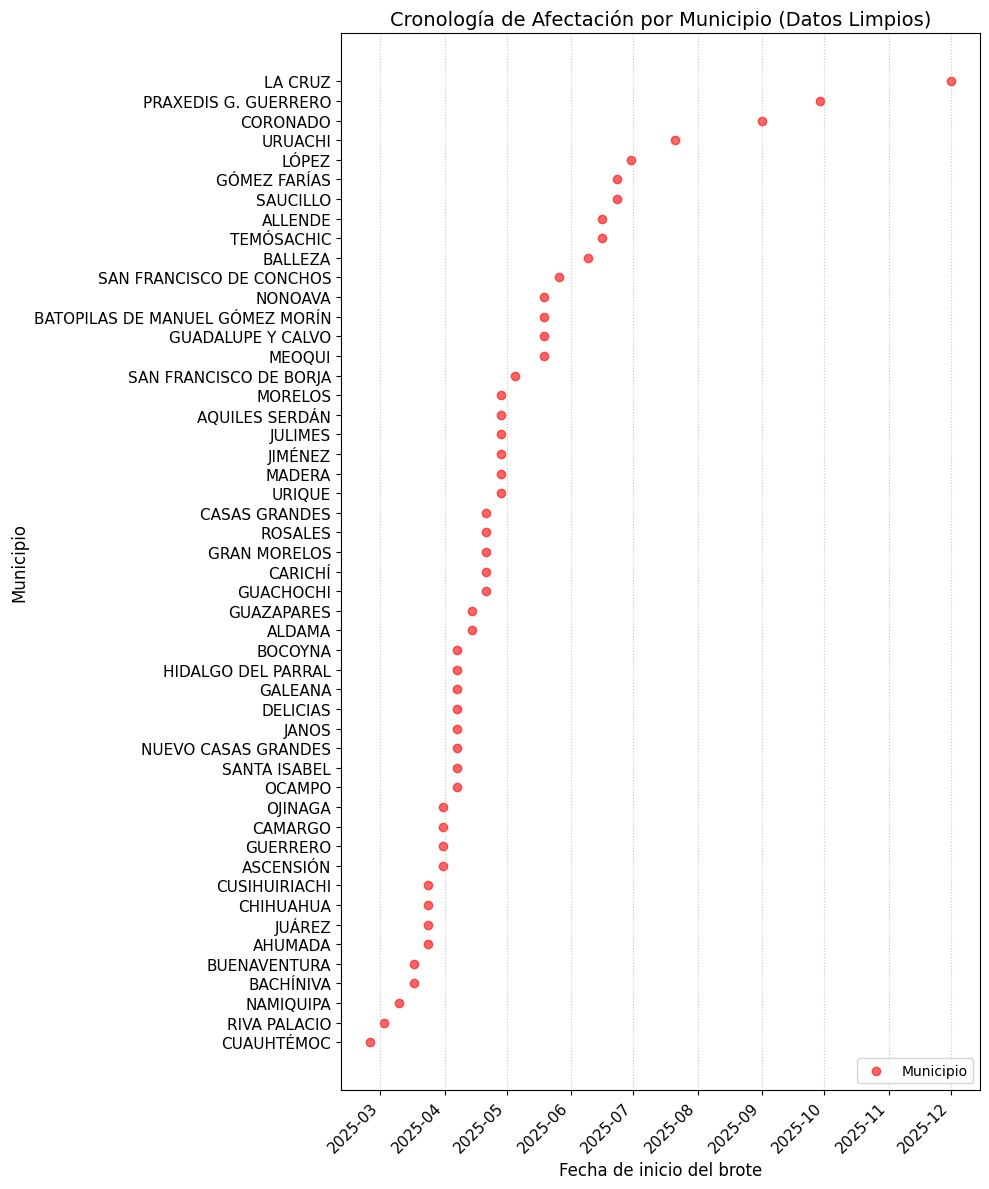

In [48]:
plt.figure(figsize=(10, 12))

secuencia_propagacion = secuencia_propagacion.sort_values()

plt.scatter(
    secuencia_propagacion.values,
    secuencia_propagacion.index,
    color='red',
    alpha=0.6,
    label='Municipio'
)

plt.title('Cronología de Afectación por Municipio (Datos Limpios)', fontsize=14)
plt.xlabel('Fecha de inicio del brote', fontsize=12)
plt.ylabel('Municipio', fontsize=12)

# Grid solo en eje x
plt.grid(True, axis='x', linestyle=':', alpha=0.7)

# Formato bonito para fechas (mes-año)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right')
plt.tick_params(labelsize=11)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


**Cronología de afectación municipal.** La figura muestra la fecha de inicio del brote de sarampión para cada municipio del estado de Chihuahua, ordenados cronológicamente. Se observa que el brote inicia de manera temprana en **Cuauhtémoc** a finales de febrero de 2025 y se expande progresivamente durante marzo y abril hacia municipios vecinos y centros urbanos relevantes como **Chihuahua** y **Juárez**. A partir de mayo y junio, la afectación se extiende a un mayor número de municipios, mientras que algunos presentan aparición tardía hasta el segundo semestre de 2025. Este patrón refuerza la evidencia de una propagación espacial escalonada desde un núcleo inicial hacia el resto del territorio estatal.

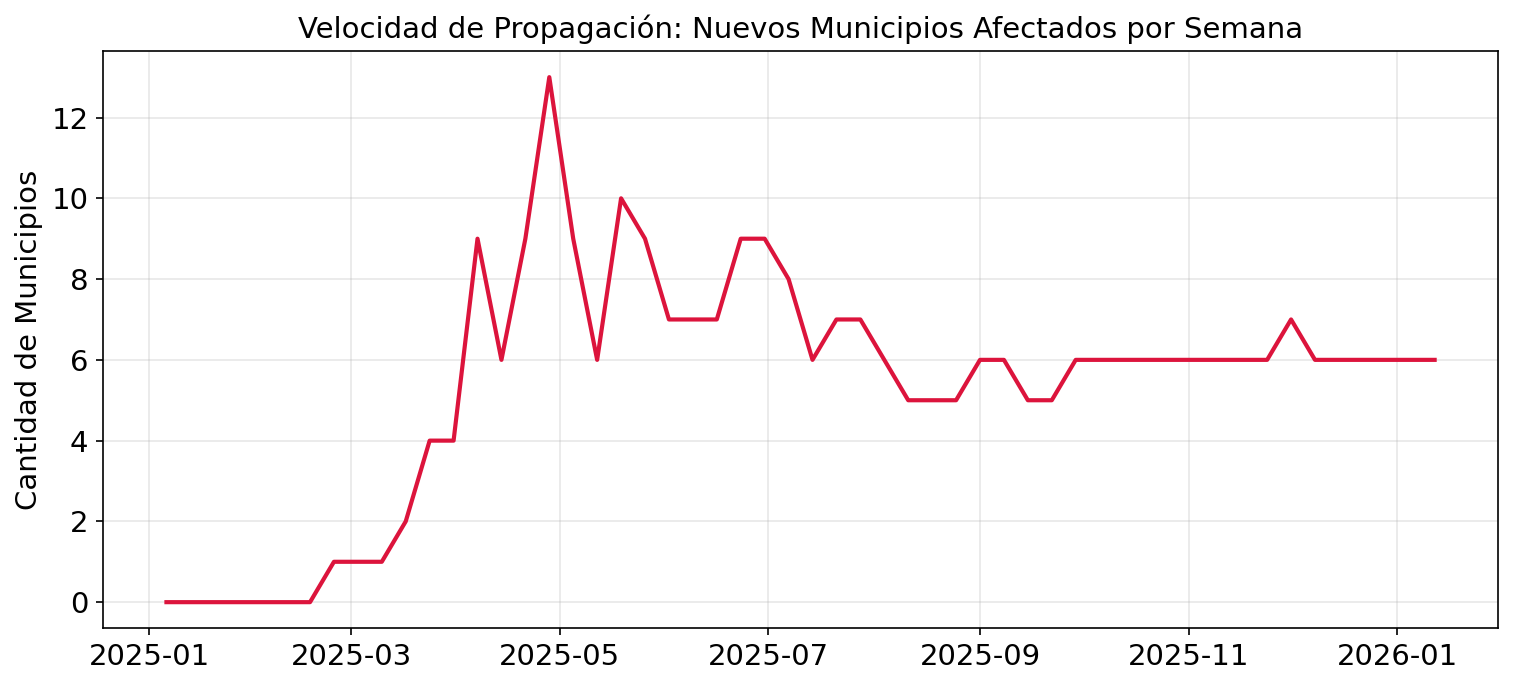

In [54]:
colonizacion = (df > 0).cumsum().apply(lambda x: (x == 1).sum(), axis=1)

plt.figure(figsize=(12, 5),dpi=150)
plt.plot(colonizacion,lw=2,color='crimson')

plt.title('Velocidad de Propagación: Nuevos Municipios Afectados por Semana', fontsize=14)
plt.ylabel('Cantidad de Municipios', fontsize=14 )
plt.tick_params(labelsize=14)
plt.xticks()
plt.grid(True, alpha=0.3)
plt.show()


**Velocidad de propagación territorial.** La figura muestra el número de municipios que registran su primer caso de sarampión en cada semana epidemiológica. Se observa una fase inicial de expansión lenta durante las primeras semanas de 2025, seguida de una **aceleración marcada entre marzo y mayo**, donde el brote coloniza simultáneamente un mayor número de municipios, alcanzando un máximo semanal. Posteriormente, la velocidad de propagación disminuye gradualmente, indicando que el virus deja de incorporarse a nuevos municipios y la dinámica pasa a estar dominada por la transmisión dentro de los territorios ya afectados. Hacia el final del periodo analizado, la colonización territorial es esporádica, consistente con una fase de agotamiento del brote a nivel estatal.


In [65]:
from scipy.stats import shapiro

# Seleccionamos los 10 municipios con mayor carga de casos
top_10_muni = df.sum().sort_values(ascending=False).head(10).index
df_matriz = df[top_10_muni]

normalidad = {}

for col in df_matriz.columns:
    serie = df_matriz[col]
    serie = serie[serie > 0]  # opcional: quitar ceros
    if len(serie) >= 3:
        stat, p = shapiro(serie)
        normalidad[col] = p
    else:
        normalidad[col] = None

normalidad


{'CUAUHTÉMOC': 0.0006052424432709813,
 'CHIHUAHUA': 0.0133819580078125,
 'NUEVO CASAS GRANDES': 5.371922452468425e-05,
 'GUACHOCHI': 0.003323741490021348,
 'OJINAGA': 0.0002932670759037137,
 'DELICIAS': 0.00019151555898133665,
 'CAMARGO': 0.014403821900486946,
 'JUÁREZ': 0.00013925354869570583,
 'AHUMADA': 0.14006105065345764,
 'GUERRERO': 0.00019427492225077003}

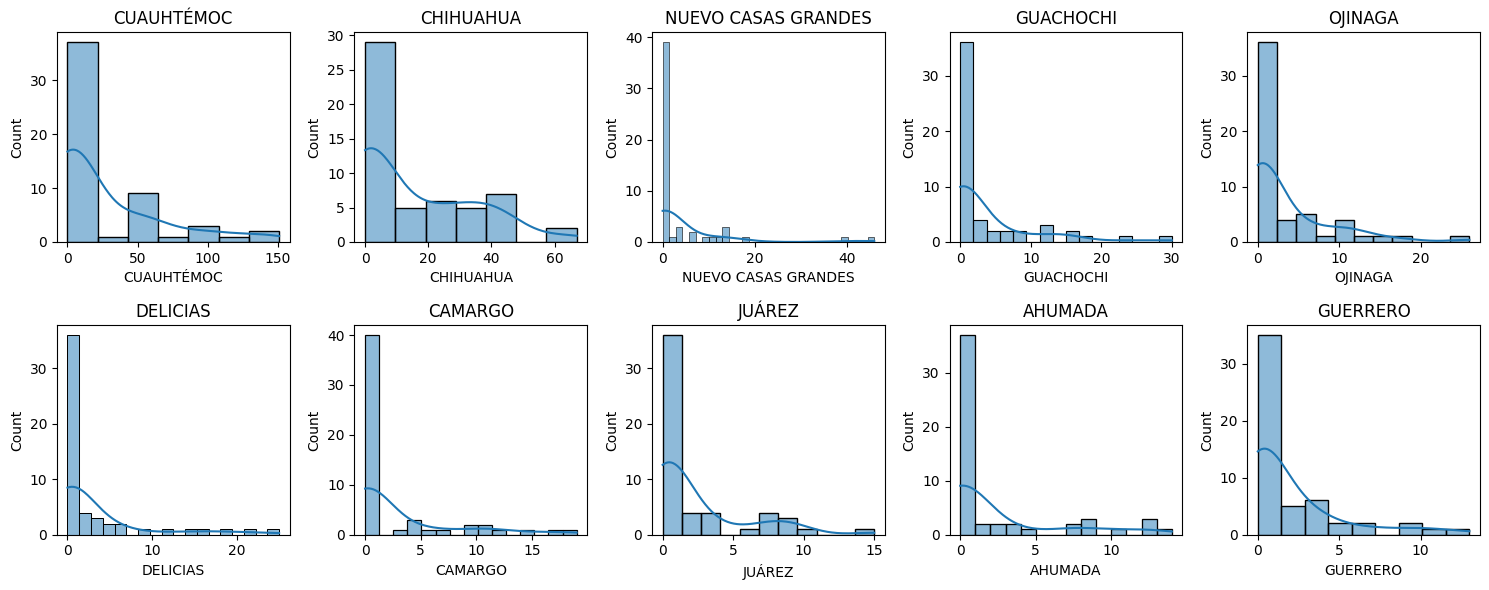

In [66]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for ax, col in zip(axes, df_matriz.columns):
    sns.histplot(df_matriz[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()


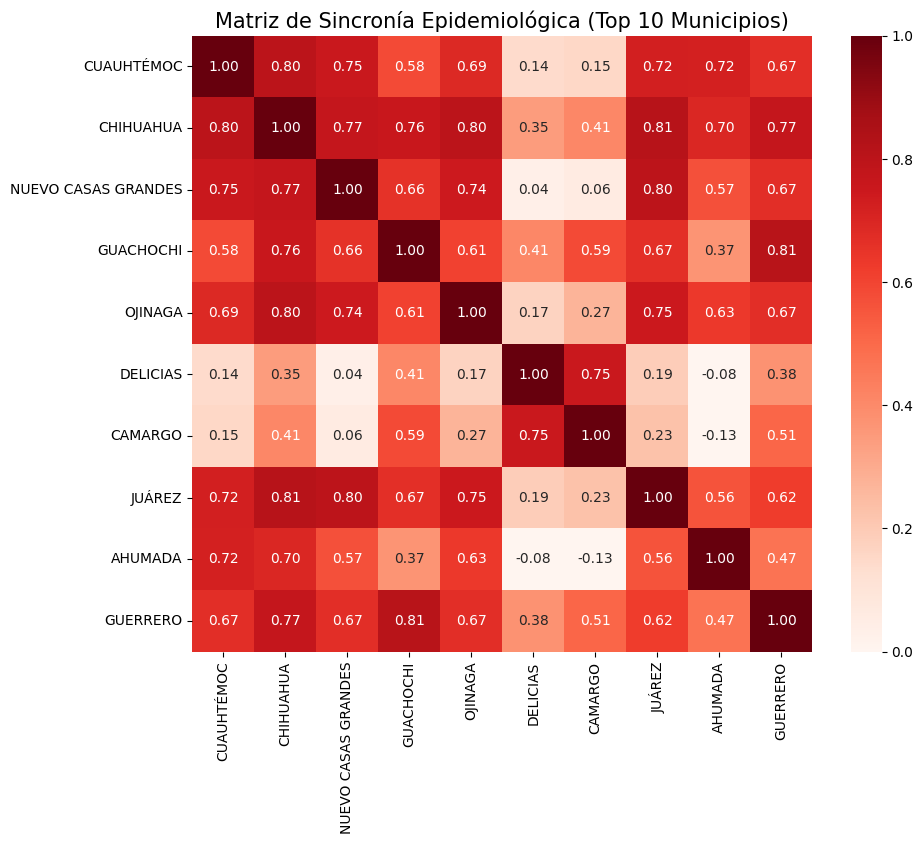

In [78]:
# Seleccionamos los 10 municipios con mayor carga de casos
top_10_muni = df.sum().sort_values(ascending=False).head(10).index
df_matriz = df[top_10_muni]

# Calculamos la matriz de correlación de Pearson entre sus series semanales
matriz_corr = df_matriz.corr('spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='Reds', fmt=".2f",
           vmin=0)
plt.title('Matriz de Sincronía Epidemiológica (Top 10 Municipios)', fontsize=15)
plt.show()

**Sincronía epidemiológica (coeficiente de Spearman).** Dado que las series semanales de casos presentan distribuciones no normales, con asimetría, ceros y picos epidémicos, se utilizó el coeficiente de Spearman para evaluar la sincronía temporal entre municipios. La matriz resultante revela un núcleo de municipios altamente sincronizados, encabezado por Cuauhtémoc, Chihuahua y Juárez, que comparten una dinámica epidémica similar, consistente con una propagación regional coordinada del brote. En contraste, municipios como Delicias y Camargo muestran correlaciones más bajas, lo que sugiere una evolución más independiente o tardía del brote. Estos resultados complementan el análisis espaciotemporal previo y refuerzan la existencia de estructuras diferenciadas en la dinámica de transmisión dentro del estado.

## *clustering* jerárquico

El *clustering* jerárquico se utiliza con el objetivo de identificar **grupos de municipios que presentan dinámicas epidémicas similares en el tiempo**, a partir de la matriz de sincronía basada en el coeficiente de Spearman. Dado que las series semanales de casos corresponden a datos de conteo no normales, la correlación de Spearman permite capturar asociaciones monótonas sin asumir linealidad. Sobre esta base, el *clustering* jerárquico ofrece una representación arborescente de las similitudes entre municipios, lo que facilita explorar la estructura multiescala del brote sin fijar previamente el número de grupos. Este enfoque es especialmente adecuado en un análisis espaciotemporal exploratorio, ya que permite distinguir un **núcleo epidémico altamente sincronizado**, municipios con **brotes secundarios desfasados**, y localidades con **dinámicas más independientes**, aportando una interpretación epidemiológica clara de los patrones de propagación territorial.


In [85]:
df = pd.read_excel(
    "serie_temporal_municipios.xlsx",
    index_col=0,
    parse_dates=True
)
df.index.name = "SEMANA_DIAG"

df.head()
df.shape 


(54, 50)

In [90]:
# Calculamos la matriz de sincronía (Spearman) para TODOS

corr_all = df.corr(method="spearman")

corr_all.shape   # matriz N_municipios × N_municipios
corr_all.head()

,AHUMADA,ALDAMA,ALLENDE,AQUILES SERDÁN,ASCENSIÓN,BACHÍNIVA,BALLEZA,BATOPILAS DE MANUEL GÓMEZ MORÍN,BOCOYNA,BUENAVENTURA,...,PRAXEDIS G. GUERRERO,RIVA PALACIO,ROSALES,SAN FRANCISCO DE BORJA,SAN FRANCISCO DE CONCHOS,SANTA ISABEL,SAUCILLO,TEMÓSACHIC,URIQUE,URUACHI
AHUMADA,1.000000,0.426905,0.117550,0.195602,0.577445,0.567157,0.005341,0.078972,0.412883,0.545246,...,-0.090979,0.619490,0.252172,0.170728,-0.098234,0.375091,-0.115279,0.160551,0.160940,-0.090979
ALDAMA,0.426905,1.000000,0.031525,0.318523,0.420991,0.257290,0.080402,0.301456,0.609376,0.338069,...,-0.076608,0.280476,0.381542,0.089374,0.023802,-0.017452,0.084428,-0.076608,0.510826,-0.076608
ALLENDE,0.117550,0.031525,1.000000,0.234296,0.013418,0.030448,0.200737,0.267626,0.346876,0.187641,...,-0.033303,-0.134858,0.150639,-0.058781,-0.107875,0.336707,0.335776,0.555046,0.080373,0.588348
AQUILES SERDÁN,0.195602,0.318523,0.234296,1.000000,0.283678,0.170983,-0.090242,0.228966,0.412322,0.240209,...,-0.038851,-0.003026,-0.117581,-0.068575,-0.125848,0.272384,0.083922,0.485643,0.278223,-0.038851
ASCENSIÓN,0.577445,0.420991,0.013418,0.283678,1.000000,0.379974,0.025064,0.407620,0.565506,0.388341,...,-0.124588,0.272436,0.056096,0.146133,0.180514,0.269603,0.233275,0.071878,0.286179,0.071878


In [94]:
# Convertir correlación → distancia (d_ij =1−ρij) 

from scipy.spatial.distance import squareform

# Distancia = 1 - correlación
dist_matrix_all = 1 - corr_all

# Aseguramos 0 en la diagonal
np.fill_diagonal(dist_matrix_all.values, 0)

# Convertimos a formato "condensed" para SciPy
dist_condensed_all = squareform(dist_matrix_all.values)


In [95]:
# dendrograma para TODOS los municipios
from scipy.cluster.hierarchy import linkage

Z_all = linkage(dist_condensed_all, method="average")

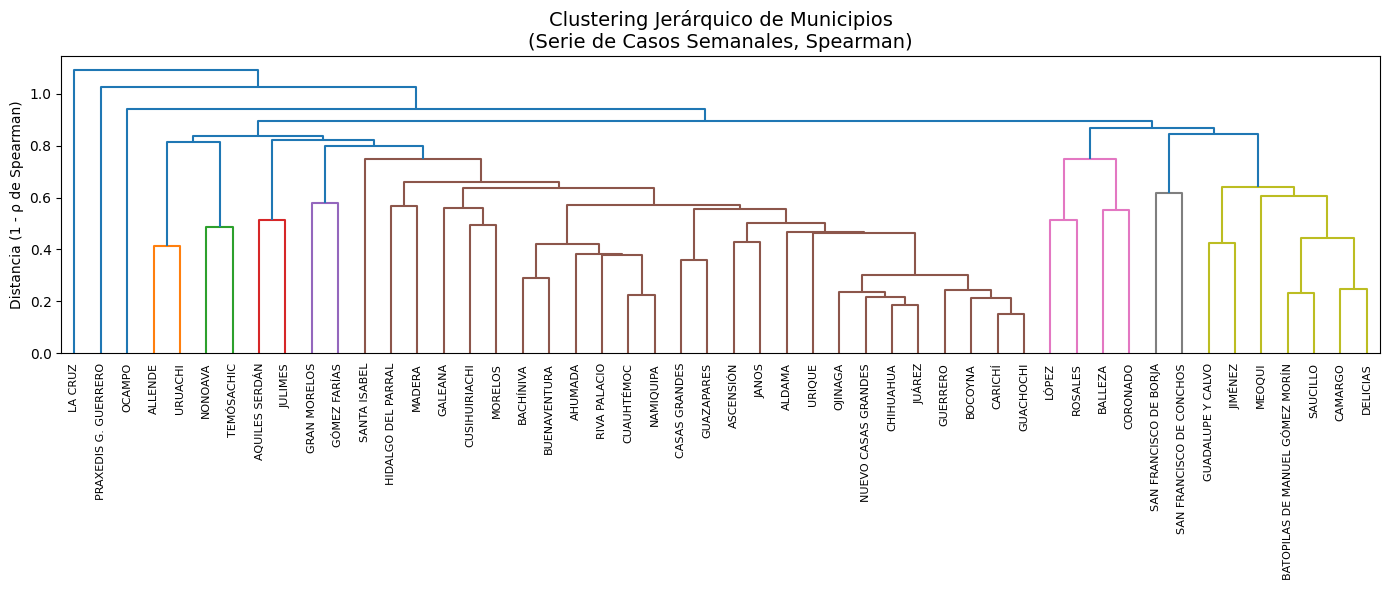

In [96]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(14, 6))

dendrogram(
    Z_all,
    labels=corr_all.index.to_list(),
    leaf_rotation=90,
    leaf_font_size=8,
)

plt.title("Clustering Jerárquico de Municipios\n(Serie de Casos Semanales, Spearman)", fontsize=14)
plt.ylabel("Distancia (1 - ρ de Spearman)")
plt.tight_layout()
plt.show()


Eje Y: distancia 1−$\rho$.

- Valores bajos ⇒ municipios con curvas semanales muy parecidas.

- Valores altos ⇒ dinámicas distintas (desfase, menor intensidad o brotes tardíos).

El árbol muestra que no hay un solo patrón homogéneo, sino:

- un núcleo grande y muy cohesivo,

- varios subgrupos intermedios, y algunos municipios claramente periféricos (brotes tardíos o débiles).

**Clustering jerárquico a nivel estatal.**
El dendrograma muestra el clustering jerárquico de todos los municipios con casos de sarampión, construido a partir de la matriz de sincronía basada en el coeficiente de Spearman para las series semanales de casos (54 semanas). La distancia utilizada fue 1−$\rho$, lo que permite agrupar municipios según la similitud temporal de sus curvas epidémicas. Se observa un núcleo epidémico principal altamente sincronizado, rodeado de municipios con brotes secundarios y otros con dinámicas tardías o más independientes. Esta estructura jerárquica revela la existencia de subregiones epidémicas dentro del estado y proporciona una visión integrada de la propagación territorial del brote, sin imponer a priori el número de grupos.



**Umbral de corte (t = 0.4).**
El dendrograma fue cortado a una distancia (t = 0.4), correspondiente a una correlación de Spearman aproximada de (\rho \approx 0.6), con el fin de identificar grupos de municipios que presentan una sincronía temporal sustantiva en sus series semanales de casos. Este umbral permite separar de manera natural un núcleo epidémico altamente coordinado de municipios con brotes secundarios o dinámicas más independientes, sin fragmentar excesivamente la estructura jerárquica ni forzar la agregación de patrones claramente distintos. La elección de (t = 0.4) se apoya tanto en la inspección visual del dendrograma —donde se observa un cambio marcado en la pendiente de las fusiones— como en la coherencia epidemiológica de los clusters resultantes, los cuales son consistentes con la cronología de afectación y la velocidad de propagación previamente analizadas.



In [104]:
from scipy.cluster.hierarchy import fcluster
clusters_all = fcluster(Z_all, t=0.4, criterion="distance")

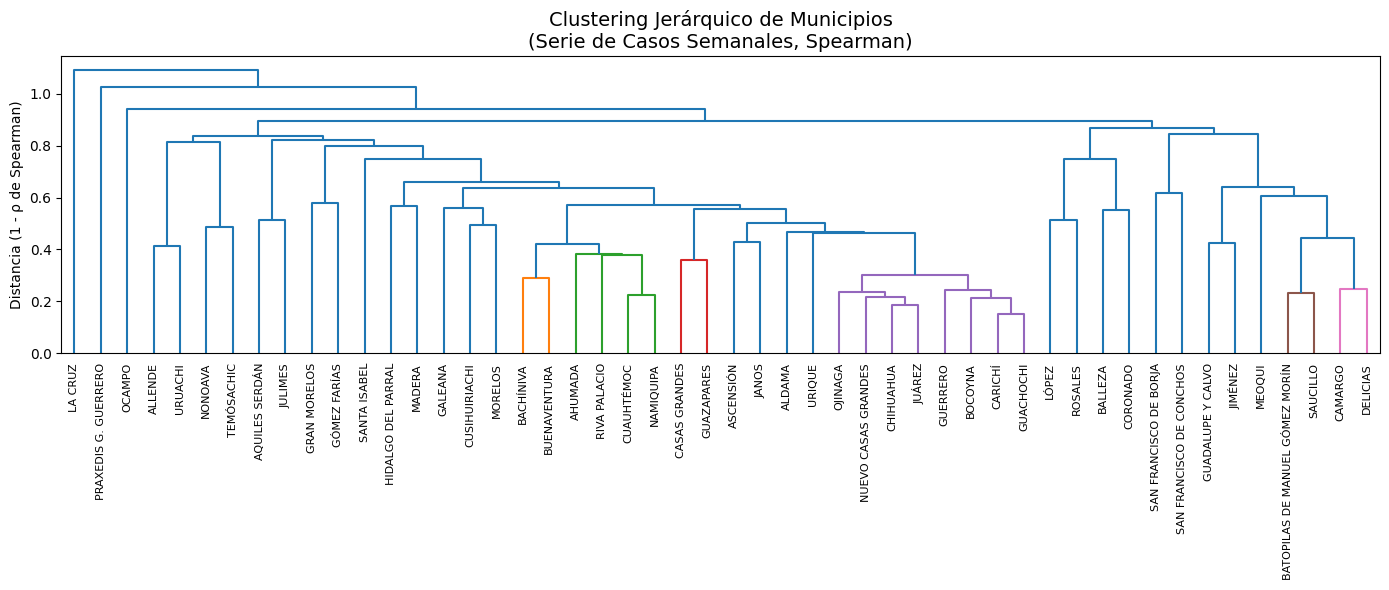

In [105]:
plt.figure(figsize=(14, 6))

dendrogram(
    Z_all,
    labels=corr_all.index.to_list(),
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=0.4
)
plt.title("Clustering Jerárquico de Municipios\n(Serie de Casos Semanales, Spearman)", fontsize=14)
plt.ylabel("Distancia (1 - ρ de Spearman)")
plt.tight_layout()
plt.show()

In [109]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd

# 1) Asignar cluster a cada municipio usando el corte t = 0.4
t = 0.4
clusters_all = fcluster(Z_all, t=t, criterion="distance")

# 2) Armar una tabla con Municipio y Cluster
tabla_clusters_all = pd.DataFrame({
    "Municipio": corr_all.index,
    "Cluster": clusters_all
}).sort_values("Cluster").reset_index(drop=True)

print(tabla_clusters_all)


                          Municipio  Cluster
0                           ALLENDE        1
1                           URUACHI        2
2                           NONOAVA        3
3                        TEMÓSACHIC        4
4                    AQUILES SERDÁN        5
5                           JULIMES        6
6                      GRAN MORELOS        7
7                      GÓMEZ FARÍAS        8
8                HIDALGO DEL PARRAL        9
9                            MADERA       10
10                    CUSIHUIRIACHI       11
11                          MORELOS       12
12                          GALEANA       13
13                        BACHÍNIVA       14
14                     BUENAVENTURA       14
15                     RIVA PALACIO       15
16                        NAMIQUIPA       15
17                          AHUMADA       15
18                       CUAUHTÉMOC       15
19                       GUAZAPARES       16
20                    CASAS GRANDES       16
21        

In [108]:
# 3) Listar municipios por cluster
for c in sorted(tabla_clusters_all["Cluster"].unique()):
    municipios_c = tabla_clusters_all.loc[
        tabla_clusters_all["Cluster"] == c, "Municipio"
    ].tolist()
    print(f"\nCluster {c} ({len(municipios_c)} municipios):")
    print(municipios_c)



Cluster 1 (1 municipios):
['ALLENDE']

Cluster 2 (1 municipios):
['URUACHI']

Cluster 3 (1 municipios):
['NONOAVA']

Cluster 4 (1 municipios):
['TEMÓSACHIC']

Cluster 5 (1 municipios):
['AQUILES SERDÁN']

Cluster 6 (1 municipios):
['JULIMES']

Cluster 7 (1 municipios):
['GRAN MORELOS']

Cluster 8 (1 municipios):
['GÓMEZ FARÍAS']

Cluster 9 (1 municipios):
['HIDALGO DEL PARRAL']

Cluster 10 (1 municipios):
['MADERA']

Cluster 11 (1 municipios):
['CUSIHUIRIACHI']

Cluster 12 (1 municipios):
['MORELOS']

Cluster 13 (1 municipios):
['GALEANA']

Cluster 14 (2 municipios):
['BACHÍNIVA', 'BUENAVENTURA']

Cluster 15 (4 municipios):
['RIVA PALACIO', 'NAMIQUIPA', 'AHUMADA', 'CUAUHTÉMOC']

Cluster 16 (2 municipios):
['GUAZAPARES', 'CASAS GRANDES']

Cluster 17 (1 municipios):
['ASCENSIÓN']

Cluster 18 (1 municipios):
['JANOS']

Cluster 19 (8 municipios):
['OJINAGA', 'NUEVO CASAS GRANDES', 'CARICHÍ', 'CHIHUAHUA', 'JUÁREZ', 'BOCOYNA', 'GUERRERO', 'GUACHOCHI']

Cluster 20 (1 municipios):
['URIQUE']


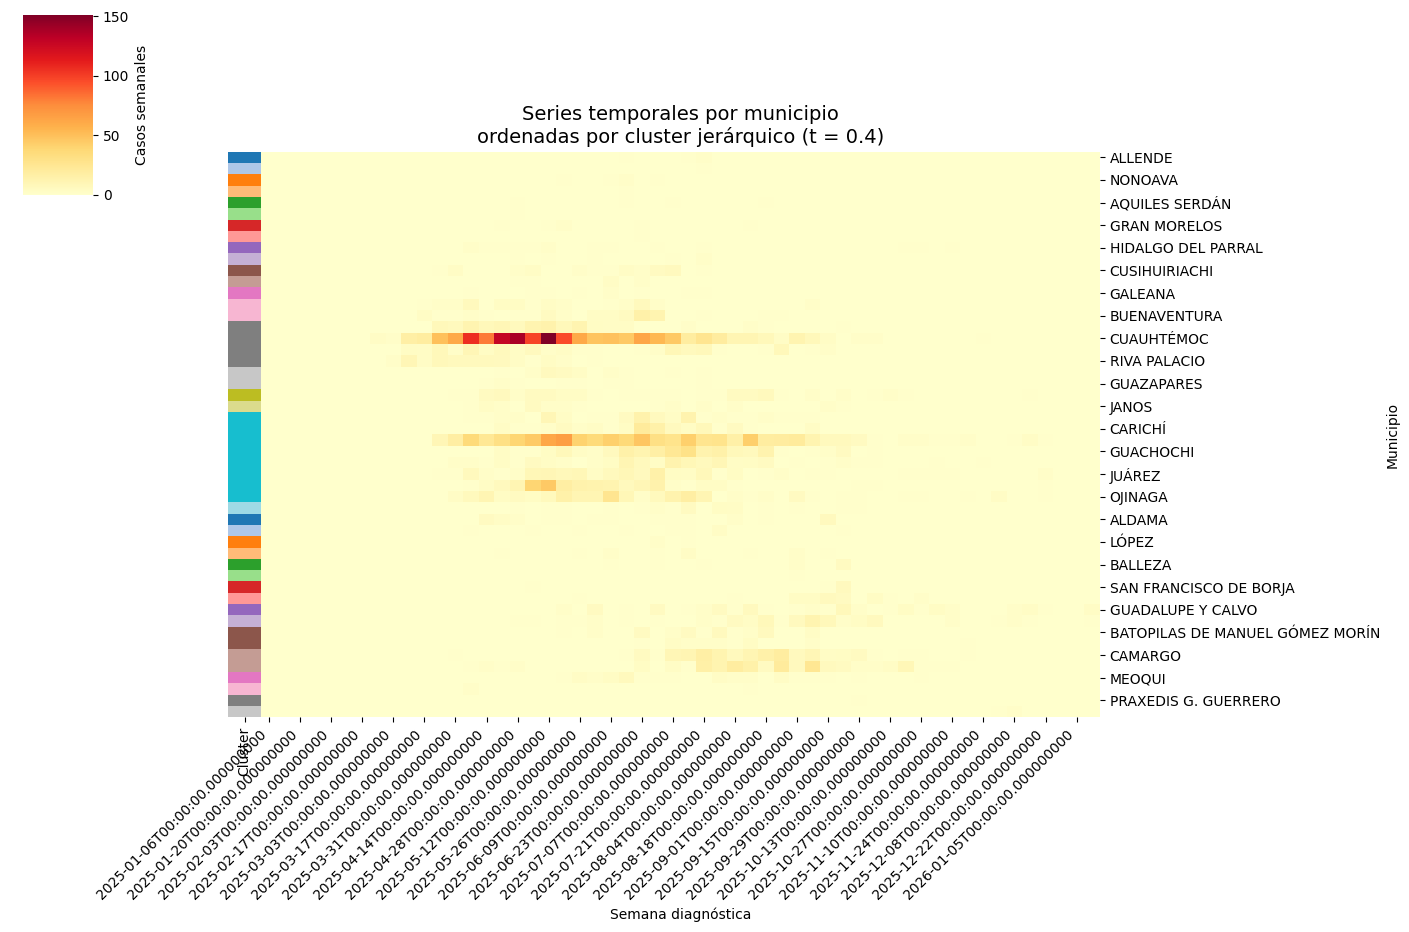

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Ordenamos municipios por número de cluster
tabla_ord = tabla_clusters_all.sort_values(["Cluster", "Municipio"])
orden_munis = tabla_ord["Municipio"].tolist()

# Reordenamos la matriz de series temporales con ese orden
df_ord = df_all[orden_munis]

# 2. Creamos una paleta de colores para los clusters
n_clusters = tabla_ord["Cluster"].nunique()
palette = sns.color_palette("tab20", n_colors=n_clusters)

# Asignamos un color a cada municipio según su cluster
map_cluster_color = {
    c: palette[i] for i, c in enumerate(sorted(tabla_ord["Cluster"].unique()))
}
row_colors = tabla_ord.set_index("Municipio")["Cluster"].map(map_cluster_color)

# 3. Heatmap sin re–clusterizar (solo visualizar lo que ya hiciste)
g = sns.clustermap(
    df_ord.T,                # municipios en las filas
    row_cluster=False,
    col_cluster=False,
    row_colors=row_colors,   # banda de color con el cluster
    cmap="YlOrRd",
    figsize=(14, 10),
    cbar_kws={"label": "Casos semanales"}
)

g.ax_heatmap.set_xlabel("Semana diagnóstica")
g.ax_heatmap.set_ylabel("Municipio")
g.ax_heatmap.set_title(
    "Series temporales por municipio\nordenadas por cluster jerárquico (t = 0.4)",
    fontsize=14
)

plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right")
plt.show()


**Estructura de los clusters obtenidos.** Al aplicar el clustering jerárquico con un umbral de corte $t=0.4$, equivalente a una correlación de Spearman mínima de 
$ρ≈0.6$, se obtiene una estructura con un número considerable de clusters pequeños y unitarios. Esto indica que muchos municipios presentan una dinámica temporal propia del brote, sin una sincronía suficientemente alta con otros territorios. En contraste, emerge un cluster de mayor tamaño que agrupa a municipios con curvas epidémicas altamente sincronizadas, constituyendo el núcleo epidémico estatal. La coexistencia de clusters grandes, pequeños y unitarios refleja una propagación espacial heterogénea, con brotes coordinados en ciertas subregiones y dinámicas locales independientes en otras.